In [1]:
import numpy as np
import matplotlib.pyplot as plt

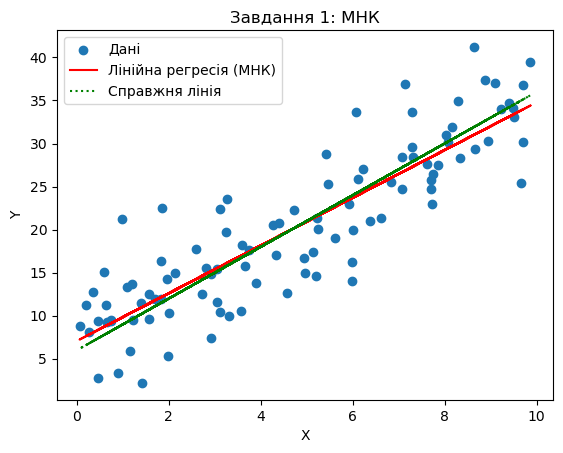

In [5]:
# Завдання 1
def generate_data(k, b, num_points=100, noise_std=5):
    np.random.seed(42)
    X = 10 * np.random.rand(num_points, 1)
    Y = k * X + b + np.random.randn(num_points, 1) * noise_std
    return X, Y

def least_squares(X, Y):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Додаємо стовпець одиниць для зсуву
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    return theta_best

# Параметри лінії, яку ми намагаємось відновити
true_k = 3
true_b = 6

# Генеруємо дані
X, Y = generate_data(true_k, true_b)

# Метод найменших квадратів
X_b = np.c_[np.ones((len(X), 1)), X]  # Додаємо стовпець одиниць для зсуву
theta_ls = least_squares(X, Y)

# Візуалізація результатів
plt.scatter(X, Y, label='Дані')
plt.plot(X, X_b.dot(theta_ls), label='Лінійна регресія (МНК)', color='red')
plt.plot(X, true_k * X + true_b, label='Справжня лінія', linestyle=':', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Завдання 1: МНК')
plt.show()

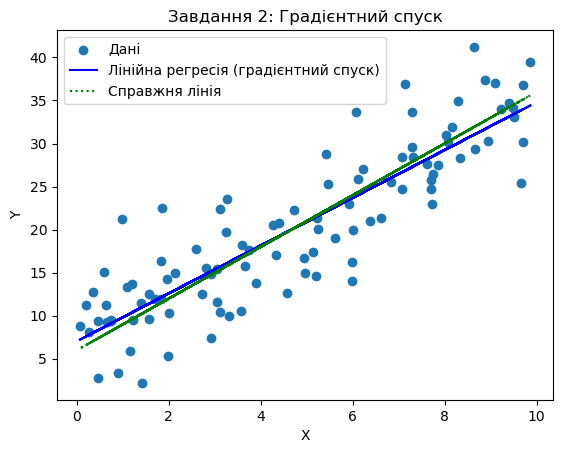

In [6]:
# Завдання 2
def gradient_descent(X, Y, learning_rate=0.01, n_iterations=1000):
    X_b = np.c_[np.ones((len(X), 1)), X]
    theta = np.random.randn(2, 1)
    for iteration in range(n_iterations):
        gradients = 2/len(X) * X_b.T.dot(X_b.dot(theta) - Y)
        theta = theta - learning_rate * gradients
    return theta

# Параметри методу градієнтного спуску
learning_rate = 0.01
n_iterations = 1000

# Градієнтний спуск
theta_gd = gradient_descent(X, Y, learning_rate, n_iterations)

# Візуалізація результатів
plt.scatter(X, Y, label='Дані')
plt.plot(X, X_b.dot(theta_gd), label='Лінійна регресія (градієнтний спуск)', color='blue')
plt.plot(X, true_k * X + true_b, label='Справжня лінія', linestyle=':', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Завдання 2: Градієнтний спуск')
plt.show()
